### Importing the required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

Assigning the page address to the url 

In [2]:
url = 'https://www.swiggy.com/city/hyderabad'

In [3]:
 page = requests.get(url)

Checking the status code of the page

In [4]:
page.status_code

200

Printing the content of the page

In [5]:
pagecontent = page.text

In [6]:
pagecontent

'<!DOCTYPE html><html lang="en" class=><head>  <link rel="preconnect" href="https://res.cloudinary.com" crossorigin="anonymous">  <link rel="preconnect" href="https://analytics.swiggy.com" crossorigin="anonymous">   <link rel="dns-prefetch" href="https://res.cloudinary.com">  <link rel="dns-prefetch" href="https://analytics.swiggy.com">  <link rel="dns-prefetch" href="https://www.googletagmanager.com">  <link rel="dns-prefetch" href="https://www.gstatic.com">  <link rel="dns-prefetch" href="https://www.google-analytics.com">  <link rel="dns-prefetch" href="https://q.quora.com">  <link rel="dns-prefetch" href="https://www.google.co.in">  <link rel="dns-prefetch" href="https://www.facebook.com">  <link rel="dns-prefetch" href="https://www.googleadservices.com">  <link rel="dns-prefetch" href="https://bat.bing.com">  <meta http-equiv="Content-type" content="text/html; charset=utf-8"><meta charset="utf-8">  <link rel="stylesheet" href="https://res.cloudinary.com/swiggy/raw/upload/static-as

### Web Scrapping

In [7]:
soup = BeautifulSoup(pagecontent)

In [8]:
list1 = soup.find_all("div",class_='_1HEuF')
list1

[<div class="_1HEuF"><div class="_3FR5S"><div class="efp8s"><img alt="Eats Corner" class="_12_oN" height="160" width="254"/></div><div class="_3Ztcd"><div class="nA6kb">Eats Corner</div><div class="_1gURR" title="Chinese, Fast Food">Chinese, Fast Food</div></div><div class="_3Mn31"><div class="_9uwBC wY0my"><span class="icon-star _537e4"></span><span>4.0</span></div><div>•</div><div>36 MINS</div><div>•</div><div class="nVWSi">₹300 FOR TWO</div></div><div class="Zlfdx"><span class="icon-offer-filled _2fujs"></span><span class="sNAfh">50% off | Use WELCOME50</span></div></div><div class="_3B2qG"><span aria-label="Open" class="_2ECk4 _24tlh" role="button">Quick View</span></div></div>,
 <div class="_1HEuF"><div class="_3FR5S"><div class="efp8s"><img alt="Mehfil" class="_12_oN" height="160" width="254"/></div><div class="_3Ztcd"><div class="nA6kb">Mehfil</div><div class="_1gURR" title="Biryani, Chinese, Indian, Kebabs, Tandoor, Desserts">Biryani, Chinese, Indian, Kebabs, Tandoor, Desserts<

In [9]:
name = soup.find_all('div',attrs={'class':'nA6kb'})
name

[<div class="nA6kb">Eats Corner</div>,
 <div class="nA6kb">Mehfil</div>,
 <div class="nA6kb">Santosh Dhaba Exclusive</div>,
 <div class="nA6kb">Chaitanya Food Court</div>,
 <div class="nA6kb">Lucky Multicuisine Restaurant</div>,
 <div class="nA6kb">Cheesiaano pizza</div>,
 <div class="nA6kb">Shah Ghouse Hotel</div>,
 <div class="nA6kb">Hitech Bawarchi</div>,
 <div class="nA6kb">Cream Stone Ice Cream</div>,
 <div class="nA6kb">Lucky Multicuisine Restaurant</div>,
 <div class="nA6kb">Pista House Restaurant &amp; Bakery	</div>,
 <div class="nA6kb">Faasos - Wraps &amp; Rolls</div>,
 <div class="nA6kb">Hitech Bawarchi</div>,
 <div class="nA6kb">Subbayya Gari Hotel</div>,
 <div class="nA6kb">Bliss Punjabi Paratha House</div>,
 <div class="nA6kb">Vasista's Sri Lakshmi</div>]

In [10]:
for i in list1:
    name=i.find('div',class_='nA6kb')
    print(name.text)   

Eats Corner
Mehfil
Santosh Dhaba Exclusive
Chaitanya Food Court
Lucky Multicuisine Restaurant
Cheesiaano pizza
Shah Ghouse Hotel
Hitech Bawarchi
Cream Stone Ice Cream
Lucky Multicuisine Restaurant
Pista House Restaurant & Bakery	
Faasos - Wraps & Rolls
Hitech Bawarchi
Subbayya Gari Hotel
Bliss Punjabi Paratha House
Vasista's Sri Lakshmi


In [11]:
name_list= [] 
cuisine_list= []
green_rating_list = []
orange_rating_list= []
avg_price_two_list= []
coupon_code_list= []

for i in range(1,32):
    url = 'https://swiggy.com/city/hyderabad?page='+str(i)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    list1 = soup.find_all('div',class_='_1HEuF')
    
    for j in list1:
        
        name = j.find('div',class_='nA6kb')
        if name is None:
            name_list.append(np.NaN)
        else:
            name_list.append(name.text)
            
        cuisine = j.find('div',class_='_1gURR')
        if cuisine is None:
            cusine_list.append(np.NaN)
        else:
            cuisine_list.append(cuisine.text)
            
        rating_green=j.find('div',class_='_9uwBC wY0my')
        if rating_green is None:
            green_rating_list.append(np.NaN)
        else:
            green_rating_list.append(rating_green.text)
        
        rating_orange=j.find('div',class_='_9uwBC _2lAlc')
        if rating_orange is None:
            orange_rating_list.append(np.NaN)
        else:
            orange_rating_list.append(rating_orange.text)
        
        avg_price_two=j.find('div',class_='nVWSi')
        if avg_price_two is None:
            avg_price_two_list.append(np.NaN)
        else:
            avg_price_two_list.append(avg_price_two.text)
        
        coupon_code=j.find('span',class_='sNAfh')
        if coupon_code is None:
            coupon_code_list.append(np.NaN)
        else:
            coupon_code_list.append(coupon_code.text)      

In [12]:
len(name_list)

496

In [13]:
len(cuisine_list)

496

In [14]:
len(green_rating_list)

496

In [15]:
len(orange_rating_list)

496

In [16]:
len(avg_price_two_list)

496

In [17]:
len(coupon_code_list)

496

In [18]:
swiggy=pd.DataFrame({'restaurant_name':name_list,'cuisine':cuisine_list,'green_rating':green_rating_list,
                     'orange_rating':orange_rating_list,'average_price':avg_price_two_list,'coupon_code':coupon_code_list})

In [19]:
swiggy.head(10)

,restaurant_name,cuisine,green_rating,orange_rating,average_price,coupon_code
0,Santosh Dhaba Exclusive,"North Indian, Chinese",NaN,3.8,₹300 FOR TWO,50% off | Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,₹300 FOR TWO,50% off | Use WELCOME50
2,Eats Corner,"Chinese, Fast Food",4.0,NaN,₹300 FOR TWO,50% off | Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,NaN,₹600 FOR TWO,50% off | Use WELCOME50
4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",NaN,3.6,₹400 FOR TWO,50% off | Use WELCOME50
5,Cheesiaano pizza,"Italian, Pizzas",NaN,3.8,₹300 FOR TWO,50% off | Use WELCOME50
6,Shah Ghouse Hotel,"Biryani, North Indian, Chinese, Mughlai, Tandoor",NaN,3.8,₹300 FOR TWO,50% off | Use WELCOME50
7,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",NaN,3.6,₹300 FOR TWO,50% off | Use WELCOME50
8,Cream Stone Ice Cream,"Ice Cream, Desserts, Beverages, Ice Cream Cakes",4.4,NaN,₹350 FOR TWO,30% off | Use SPECIALS
9,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",NaN,3.5,₹300 FOR TWO,50% off | Use WELCOME50


In [20]:
swiggy.tail(10)

,restaurant_name,cuisine,green_rating,orange_rating,average_price,coupon_code
486,SHANDAR SHAWRMA STAR,Arabian,NaN,3.0,₹200 FOR TWO,50% off | Use WELCOME50
487,Angrezee Tadka,"Chinese, Indian, Desserts, North Indian, Tando...",NaN,3.5,₹500 FOR TWO,50% off | Use WELCOME50
488,FLOURISH BAKERY & SWEETS,"Bakery, Sweets, Fast Food",NaN,NaN,₹200 FOR TWO,50% off | Use WELCOME50
489,Hafeezpet Vantillu,"North Indian, South Indian",NaN,3.0,₹250 FOR TWO,50% off | Use WELCOME50
490,AVANI'S BISTRO,"Chinese, Indian, Snacks",NaN,NaN,₹200 FOR TWO,50% off | Use WELCOME50
491,BASKET K C H,"Chinese, Indian",NaN,NaN,₹200 FOR TWO,50% off | Use WELCOME50
492,Lentimental,"South Indian, Biryani, Beverages",4.7,NaN,₹600 FOR TWO,50% off | Use WELCOME50
493,Dhaba cafe,"Indian, Italian, Fast Food, Beverages",NaN,3.9,₹500 FOR TWO,50% off | Use WELCOME50
494,PVR Cafe,"Snacks, Fast Food, Beverages",NaN,3.8,₹400 FOR TWO,50% off | Use TRYNEW
495,BREAK FAST,"Chinese, Biryani, Snacks",NaN,NaN,₹500 FOR TWO,50% off | Use WELCOME50


### Data Cleaning

In [21]:
swiggy.duplicated().sum()

21

In [22]:
swiggy[swiggy.duplicated()==False].count()

restaurant_name    475
cuisine            475
green_rating       222
orange_rating      212
average_price      475
coupon_code        475
dtype: int64

In [23]:
swiggy.drop_duplicates(inplace=True)

In [24]:
swiggy.duplicated().sum()

0

In [25]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 495
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_name  475 non-null    object
 1   cuisine          475 non-null    object
 2   green_rating     222 non-null    object
 3   orange_rating    212 non-null    object
 4   average_price    475 non-null    object
 5   coupon_code      475 non-null    object
dtypes: object(6)
memory usage: 26.0+ KB


In [26]:
df = swiggy['average_price'].str.split(' ',n=1,expand=True)

In [27]:
df = swiggy['average_price'].str.split('₹',n=1,expand=True)

In [28]:
data = df[1].str.split(' ',n=1,expand=True)

In [29]:
swiggy.insert(loc=5, column='price_per_two', value=data[0])

In [30]:
df_1 = swiggy.drop(['average_price'],axis=1)
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code
0,Santosh Dhaba Exclusive,"North Indian, Chinese",NaN,3.8,300,50% off | Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,50% off | Use WELCOME50
2,Eats Corner,"Chinese, Fast Food",4.0,NaN,300,50% off | Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,NaN,600,50% off | Use WELCOME50
4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",NaN,3.6,400,50% off | Use WELCOME50
...,...,...,...,...,...,...
491,BASKET K C H,"Chinese, Indian",NaN,NaN,200,50% off | Use WELCOME50
492,Lentimental,"South Indian, Biryani, Beverages",4.7,NaN,600,50% off | Use WELCOME50
493,Dhaba cafe,"Indian, Italian, Fast Food, Beverages",NaN,3.9,500,50% off | Use WELCOME50
494,PVR Cafe,"Snacks, Fast Food, Beverages",NaN,3.8,400,50% off | Use TRYNEW


In [31]:
df_2 = swiggy['coupon_code'].str.split('|',n=1,expand=True)
df_2

,0,1
0,50% off,Use WELCOME50
1,50% off,Use WELCOME50
2,50% off,Use WELCOME50
3,50% off,Use WELCOME50
4,50% off,Use WELCOME50
...,...,...
491,50% off,Use WELCOME50
492,50% off,Use WELCOME50
493,50% off,Use WELCOME50
494,50% off,Use TRYNEW


In [32]:
df_3 = df_2.replace(to_replace=["FREE DELIVERY"],value="0% off")
df_3

,0,1
0,50% off,Use WELCOME50
1,50% off,Use WELCOME50
2,50% off,Use WELCOME50
3,50% off,Use WELCOME50
4,50% off,Use WELCOME50
...,...,...
491,50% off,Use WELCOME50
492,50% off,Use WELCOME50
493,50% off,Use WELCOME50
494,50% off,Use TRYNEW


In [33]:
df_1.insert(loc=5, column='Discount', value=df_3[0])
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,Discount,coupon_code
0,Santosh Dhaba Exclusive,"North Indian, Chinese",NaN,3.8,300,50% off,50% off | Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,50% off,50% off | Use WELCOME50
2,Eats Corner,"Chinese, Fast Food",4.0,NaN,300,50% off,50% off | Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,NaN,600,50% off,50% off | Use WELCOME50
4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",NaN,3.6,400,50% off,50% off | Use WELCOME50
...,...,...,...,...,...,...,...
491,BASKET K C H,"Chinese, Indian",NaN,NaN,200,50% off,50% off | Use WELCOME50
492,Lentimental,"South Indian, Biryani, Beverages",4.7,NaN,600,50% off,50% off | Use WELCOME50
493,Dhaba cafe,"Indian, Italian, Fast Food, Beverages",NaN,3.9,500,50% off,50% off | Use WELCOME50
494,PVR Cafe,"Snacks, Fast Food, Beverages",NaN,3.8,400,50% off,50% off | Use TRYNEW


In [34]:
df_1.insert(loc=6,column='coupon',value=df_3[1])
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,Discount,coupon,coupon_code
0,Santosh Dhaba Exclusive,"North Indian, Chinese",NaN,3.8,300,50% off,Use WELCOME50,50% off | Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,50% off,Use WELCOME50,50% off | Use WELCOME50
2,Eats Corner,"Chinese, Fast Food",4.0,NaN,300,50% off,Use WELCOME50,50% off | Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,NaN,600,50% off,Use WELCOME50,50% off | Use WELCOME50
4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",NaN,3.6,400,50% off,Use WELCOME50,50% off | Use WELCOME50
...,...,...,...,...,...,...,...,...
491,BASKET K C H,"Chinese, Indian",NaN,NaN,200,50% off,Use WELCOME50,50% off | Use WELCOME50
492,Lentimental,"South Indian, Biryani, Beverages",4.7,NaN,600,50% off,Use WELCOME50,50% off | Use WELCOME50
493,Dhaba cafe,"Indian, Italian, Fast Food, Beverages",NaN,3.9,500,50% off,Use WELCOME50,50% off | Use WELCOME50
494,PVR Cafe,"Snacks, Fast Food, Beverages",NaN,3.8,400,50% off,Use TRYNEW,50% off | Use TRYNEW


In [35]:
df_1.drop(['coupon_code'],axis=1,inplace=True)
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,Discount,coupon
0,Santosh Dhaba Exclusive,"North Indian, Chinese",NaN,3.8,300,50% off,Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,50% off,Use WELCOME50
2,Eats Corner,"Chinese, Fast Food",4.0,NaN,300,50% off,Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,NaN,600,50% off,Use WELCOME50
4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",NaN,3.6,400,50% off,Use WELCOME50
...,...,...,...,...,...,...,...
491,BASKET K C H,"Chinese, Indian",NaN,NaN,200,50% off,Use WELCOME50
492,Lentimental,"South Indian, Biryani, Beverages",4.7,NaN,600,50% off,Use WELCOME50
493,Dhaba cafe,"Indian, Italian, Fast Food, Beverages",NaN,3.9,500,50% off,Use WELCOME50
494,PVR Cafe,"Snacks, Fast Food, Beverages",NaN,3.8,400,50% off,Use TRYNEW


In [36]:
df_5 = df_1['coupon'].str.split('Use',n=1,expand=True)
df_5

,0,1
0,,WELCOME50
1,,WELCOME50
2,,WELCOME50
3,,WELCOME50
4,,WELCOME50
...,...,...
491,,WELCOME50
492,,WELCOME50
493,,WELCOME50
494,,TRYNEW


In [37]:
df_1.insert(loc=5, column='coupon_code', value=df_5[1])
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount,coupon
0,Santosh Dhaba Exclusive,"North Indian, Chinese",NaN,3.8,300,WELCOME50,50% off,Use WELCOME50
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,WELCOME50,50% off,Use WELCOME50
2,Eats Corner,"Chinese, Fast Food",4.0,NaN,300,WELCOME50,50% off,Use WELCOME50
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,NaN,600,WELCOME50,50% off,Use WELCOME50
4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",NaN,3.6,400,WELCOME50,50% off,Use WELCOME50
...,...,...,...,...,...,...,...,...
491,BASKET K C H,"Chinese, Indian",NaN,NaN,200,WELCOME50,50% off,Use WELCOME50
492,Lentimental,"South Indian, Biryani, Beverages",4.7,NaN,600,WELCOME50,50% off,Use WELCOME50
493,Dhaba cafe,"Indian, Italian, Fast Food, Beverages",NaN,3.9,500,WELCOME50,50% off,Use WELCOME50
494,PVR Cafe,"Snacks, Fast Food, Beverages",NaN,3.8,400,TRYNEW,50% off,Use TRYNEW


In [38]:
df_1.drop(['coupon'],axis=1,inplace=True)
df_1

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
0,Santosh Dhaba Exclusive,"North Indian, Chinese",NaN,3.8,300,WELCOME50,50% off
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",NaN,3.9,300,WELCOME50,50% off
2,Eats Corner,"Chinese, Fast Food",4.0,NaN,300,WELCOME50,50% off
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,NaN,600,WELCOME50,50% off
4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",NaN,3.6,400,WELCOME50,50% off
...,...,...,...,...,...,...,...
491,BASKET K C H,"Chinese, Indian",NaN,NaN,200,WELCOME50,50% off
492,Lentimental,"South Indian, Biryani, Beverages",4.7,NaN,600,WELCOME50,50% off
493,Dhaba cafe,"Indian, Italian, Fast Food, Beverages",NaN,3.9,500,WELCOME50,50% off
494,PVR Cafe,"Snacks, Fast Food, Beverages",NaN,3.8,400,TRYNEW,50% off


In [39]:
df_1.tail()

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
491,BASKET K C H,"Chinese, Indian",NaN,NaN,200,WELCOME50,50% off
492,Lentimental,"South Indian, Biryani, Beverages",4.7,NaN,600,WELCOME50,50% off
493,Dhaba cafe,"Indian, Italian, Fast Food, Beverages",NaN,3.9,500,WELCOME50,50% off
494,PVR Cafe,"Snacks, Fast Food, Beverages",NaN,3.8,400,TRYNEW,50% off
495,BREAK FAST,"Chinese, Biryani, Snacks",NaN,NaN,500,WELCOME50,50% off


In [40]:
df_1['green_rating'].value_counts()

4.0    67
4.1    58
4.2    37
4.3    26
4.4    16
4.5     9
4.6     5
4.7     3
4.8     1
Name: green_rating, dtype: int64

In [41]:
df_1['green_rating'].fillna(value='4.0',inplace=True)

In [42]:
df_1.head()

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
0,Santosh Dhaba Exclusive,"North Indian, Chinese",4.0,3.8,300,WELCOME50,50% off
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",4.0,3.9,300,WELCOME50,50% off
2,Eats Corner,"Chinese, Fast Food",4.0,NaN,300,WELCOME50,50% off
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,NaN,600,WELCOME50,50% off
4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",4.0,3.6,400,WELCOME50,50% off


In [43]:
df_1.describe()

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
count,475,475,475,212,475,446,475
unique,472,323,9,10,37,4,14
top,KARACHI BAKERY,Indian,4.0,3.9,300,WELCOME50,50% off
freq,2,22,320,56,96,431,437


In [44]:
df_1['orange_rating'].fillna(value='3.9',inplace=True)

In [45]:
df_1['price_per_two']=df_1['price_per_two'].astype(int)

In [46]:
df_1['green_rating']=df_1['green_rating'].astype(float)

In [47]:
df_1['orange_rating']=df_1['orange_rating'].astype(float)

In [48]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 495
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  475 non-null    object 
 1   cuisine          475 non-null    object 
 2   green_rating     475 non-null    float64
 3   orange_rating    475 non-null    float64
 4   price_per_two    475 non-null    int32  
 5   coupon_code      446 non-null    object 
 6   Discount         475 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 27.8+ KB


### Data Visualization

#### Uni Variate Analysis

In [49]:
cuisine_value = df_1.cuisine.value_counts().values

In [50]:
cuisine_names = df_1.cuisine.value_counts().index

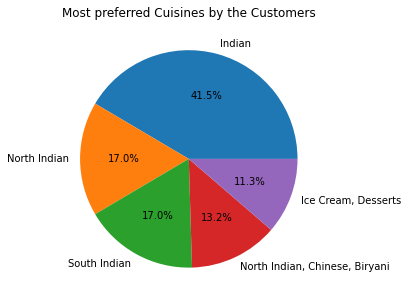

In [51]:
plt.figure(figsize=(5,5))
#explode=(0.2,0,0,0,0)
plt.pie(cuisine_value[:5],labels=cuisine_names[:5],autopct='%1.1f%%')
plt.title('Most preferred Cuisines by the Customers')
plt.show()

In [52]:
coupon_value = df_1.coupon_code.value_counts().values

In [53]:
coupon_names = df_1.coupon_code.value_counts().index

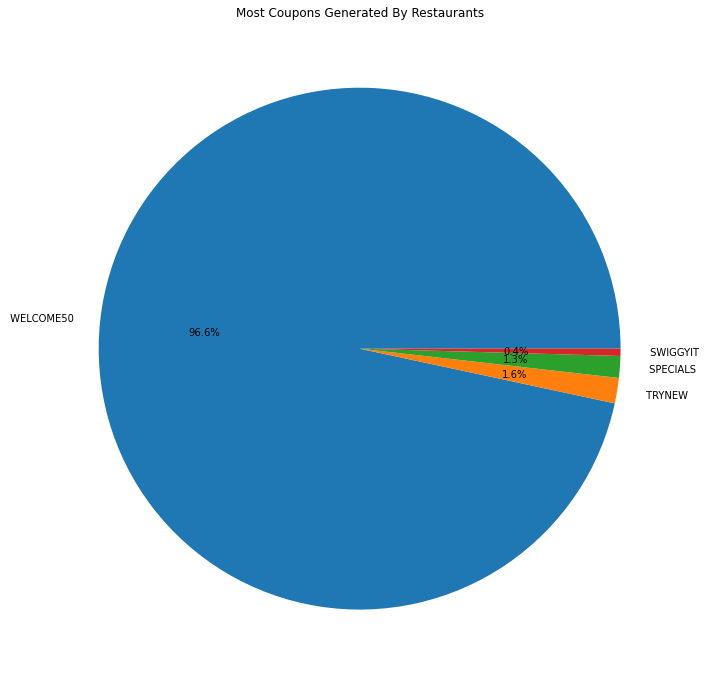

In [75]:
plt.figure(figsize=(12,12))
#explode=(0.2,0,0,0,0)
plt.pie(coupon_value[:5],labels=coupon_names[:5],autopct='%1.1f%%')
plt.title('Most Coupons Generated By Restaurants')
plt.show()

#### Bi Variate Analysis

In [55]:
df_1.nlargest(n=10,columns=['price_per_two'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
465,"Haiku, The Asian Kitchen","Asian, Japanese",4.1,3.9,1500,WELCOME50,50% off
110,Shoyu,"Japanese, Asian",4.3,3.9,1200,WELCOME50,50% off
456,Little Italy,Italian,4.0,3.9,1200,WELCOME50,50% off
469,Buffalo Wild Wings,American,4.0,3.9,1200,WELCOME50,50% off
480,Haiking Restaurant,Chinese,4.2,3.9,1200,WELCOME50,50% off
276,Mandi @36,Arabian,4.0,3.9,1000,WELCOME50,50% off
314,AnTeRa Kitchen And Bar,"Indian, Chinese",4.0,3.9,900,WELCOME50,50% off
260,Chinese Pavilion,"Chinese, Asian",4.0,3.9,850,WELCOME50,50% off
48,The Spicy Venue,"Biryani, Andhra, North Indian, Kebabs, Mughlai...",4.2,3.9,800,WELCOME50,50% off
410,BlueFox,"Biryani, North Indian, Chinese, Tandoor",4.0,3.9,800,WELCOME50,50% off


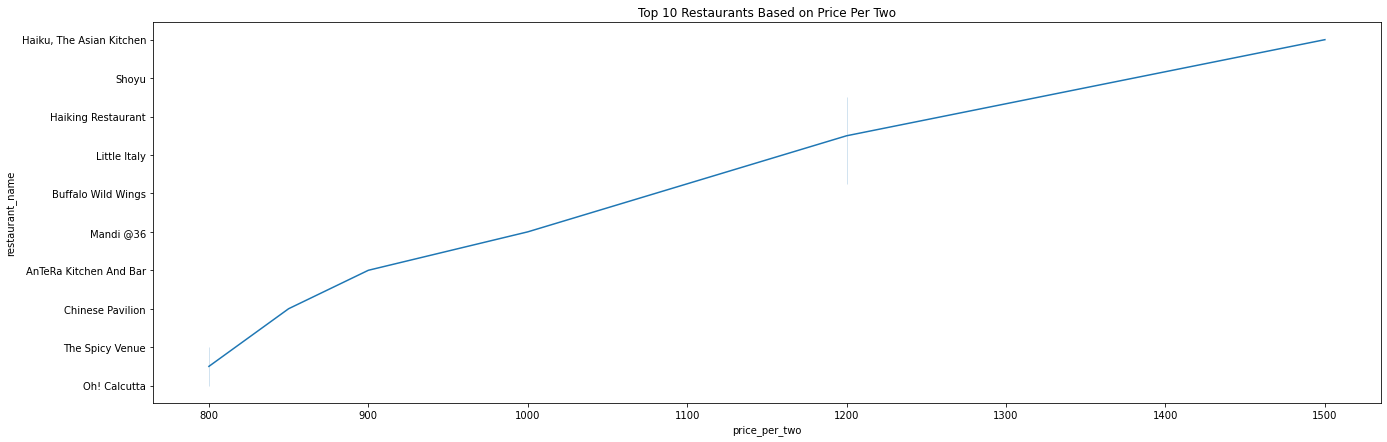

In [56]:
#costliest
plt.figure(figsize=(22,7))
sns.lineplot(x='price_per_two',y='restaurant_name',data=df_1.nlargest(n=10,columns=['price_per_two','green_rating']))
plt.title('Top 10 Restaurants Based on Price Per Two')
plt.show()

In [57]:
df_1.nsmallest(n=10,columns=['price_per_two'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
134,MANA MALLUS KITCHEN,Indian,4.0,3.9,50,WELCOME50,50% off
166,BANGALORE BAKERS,Indian,4.0,3.3,100,WELCOME50,50% off
253,GODHAVARI CURRY EXPRESS,"North Indian, Chinese, Snacks, Biryani, Desserts",4.0,3.5,100,WELCOME50,50% off
303,Suprabhatam traditional foods,South Indian,4.0,3.9,100,WELCOME50,50% off
320,MM bakers,"Bakery, Snacks, Fast Food",4.0,3.9,100,WELCOME50,50% off
377,Yard Bakery,"Bakery, Desserts",4.0,3.9,100,WELCOME50,50% off
39,NIC Natural Ice Creams,"Ice Cream, Desserts",4.5,3.9,120,SPECIALS,50% off
296,Veda Tiffins,"South Indian, Street Food",4.0,3.9,120,WELCOME50,50% off
367,Grameen Kulfi,"Ice Cream, Desserts",4.8,3.9,120,SPECIALS,50% off
120,Tibbs Frankie,"Indian, Fast Food, Snacks",4.1,3.9,140,WELCOME50,50% off


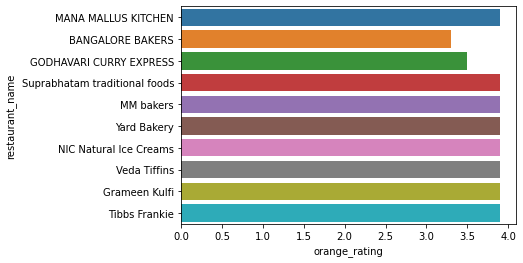

In [58]:
sns.barplot(x='orange_rating',y='restaurant_name',data=df_1.nsmallest(n=10,columns=['price_per_two']))
plt.show()

In [59]:
df_1.nlargest(n=10,columns=['green_rating'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
367,Grameen Kulfi,"Ice Cream, Desserts",4.8,3.9,120,SPECIALS,50% off
189,Kwality Walls Frozen Dessert and Ice Cream Shop,"Desserts, Ice Cream, Ice Cream Cakes",4.7,3.9,300,WELCOME50,50% off
424,Euphoria,"Desserts, Bakery",4.7,3.9,600,WELCOME50,50% off
492,Lentimental,"South Indian, Biryani, Beverages",4.7,3.9,600,WELCOME50,50% off
85,Vellanki Foods,Sweets,4.6,3.9,500,WELCOME50,50% off
141,Almond House,"Sweets, Desserts, Snacks",4.6,3.9,750,WELCOME50,50% off
259,Al Saba Restaurant,"North Indian, Biryani, Seafood, Chinese",4.6,3.9,350,WELCOME50,50% off
371,Dostea Chai Cafe,"Beverages, Snacks",4.6,3.9,200,WELCOME50,50% off
458,Dostea,Fast Food,4.6,3.9,200,WELCOME50,50% off
39,NIC Natural Ice Creams,"Ice Cream, Desserts",4.5,3.9,120,SPECIALS,50% off


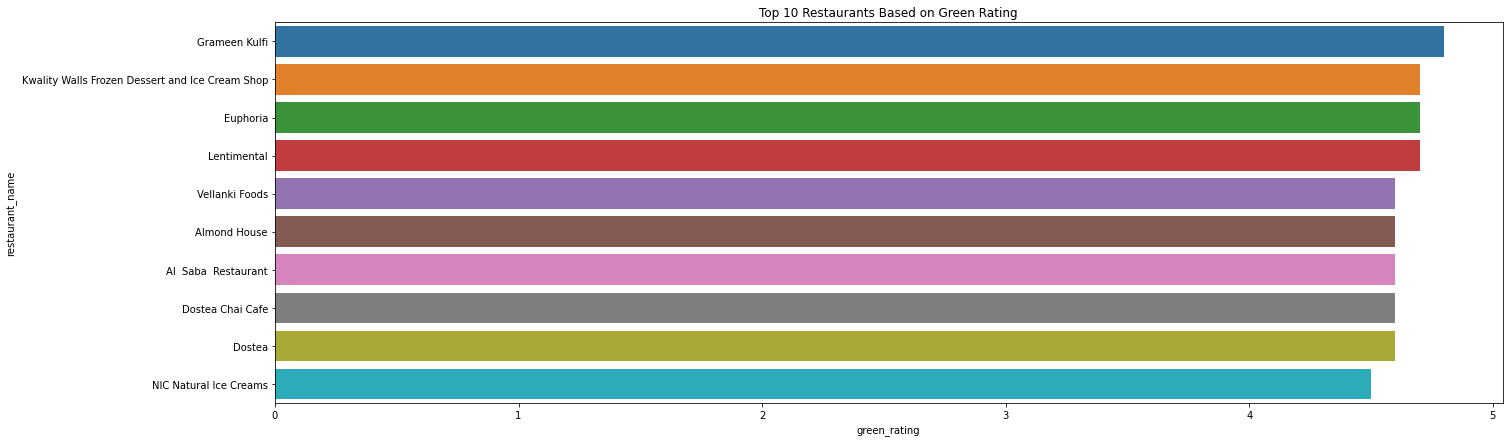

In [60]:
plt.figure(figsize=(22,7))
sns.barplot(x='green_rating',y='restaurant_name',data=df_1.nlargest(n=10,columns=['green_rating']),orient='h')
plt.title('Top 10 Restaurants Based on Green Rating')
plt.show()

In [61]:
df_1.nlargest(n=10,columns=['orange_rating'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",4.0,3.9,300,WELCOME50,50% off
2,Eats Corner,"Chinese, Fast Food",4.0,3.9,300,WELCOME50,50% off
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,3.9,600,WELCOME50,50% off
8,Cream Stone Ice Cream,"Ice Cream, Desserts, Beverages, Ice Cream Cakes",4.4,3.9,350,SPECIALS,30% off
10,Pista House Restaurant & Bakery\t,"Biryani, North Indian, Chinese, Kebabs, Mughla...",4.0,3.9,500,WELCOME50,50% off
12,Hitech Bawarchi,"Biryani, North Indian, Chinese",4.0,3.9,600,WELCOME50,50% off
15,Vasista's Sri Lakshmi,"Biryani, North Indian, Andhra, Chinese, Mughlai",4.0,3.9,350,WELCOME50,50% off
18,POP O' Bob - Bubble Tea Cafe,"Cafe, Desserts, Beverages",4.0,3.9,200,WELCOME50,50% off
21,Burger King,"Burgers, American",4.0,3.9,350,None,Get every item under 129
22,McDonald's,"Burgers, Beverages, Cafe, Desserts",4.1,3.9,400,WELCOME50,50% off


C:\Users\anuragpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anuragpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


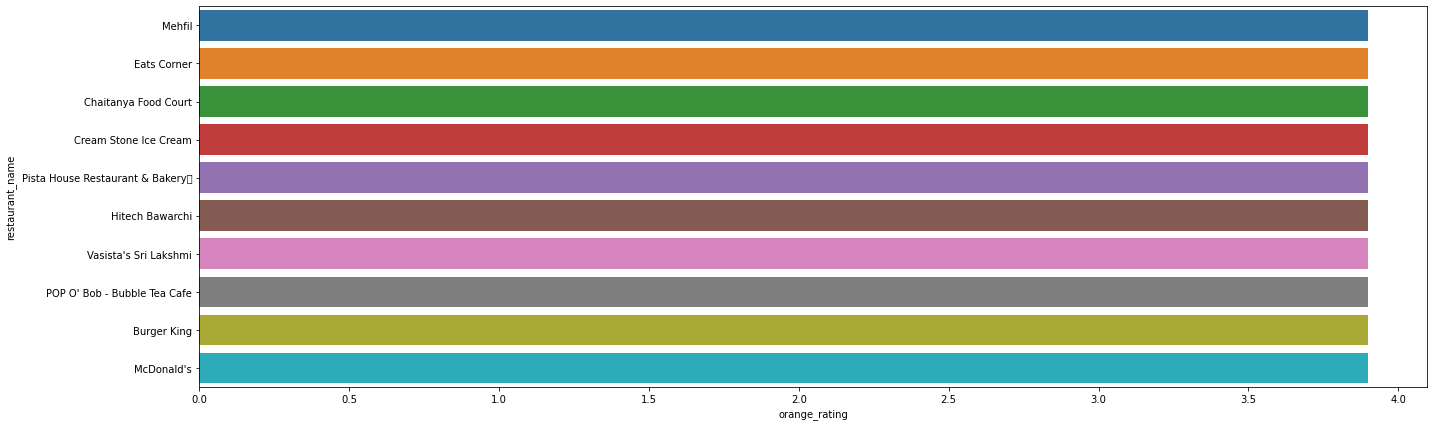

In [62]:
plt.figure(figsize=(22,7))
sns.barplot(x='orange_rating',y='restaurant_name',data=df_1.nlargest(n=10,columns=['orange_rating']),orient='h')
plt.show()

In [63]:
df_1.nsmallest(n=10,columns=['green_rating'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
0,Santosh Dhaba Exclusive,"North Indian, Chinese",4.0,3.8,300,WELCOME50,50% off
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",4.0,3.9,300,WELCOME50,50% off
2,Eats Corner,"Chinese, Fast Food",4.0,3.9,300,WELCOME50,50% off
3,Chaitanya Food Court,"Biryani, Chinese, Andhra, North Indian",4.0,3.9,600,WELCOME50,50% off
4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",4.0,3.6,400,WELCOME50,50% off
5,Cheesiaano pizza,"Italian, Pizzas",4.0,3.8,300,WELCOME50,50% off
6,Shah Ghouse Hotel,"Biryani, North Indian, Chinese, Mughlai, Tandoor",4.0,3.8,300,WELCOME50,50% off
7,Hitech Bawarchi,"Biryani, Chinese, Indian, Kebabs, Tandoor",4.0,3.6,300,WELCOME50,50% off
9,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",4.0,3.5,300,WELCOME50,50% off
10,Pista House Restaurant & Bakery\t,"Biryani, North Indian, Chinese, Kebabs, Mughla...",4.0,3.9,500,WELCOME50,50% off


C:\Users\anuragpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anuragpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


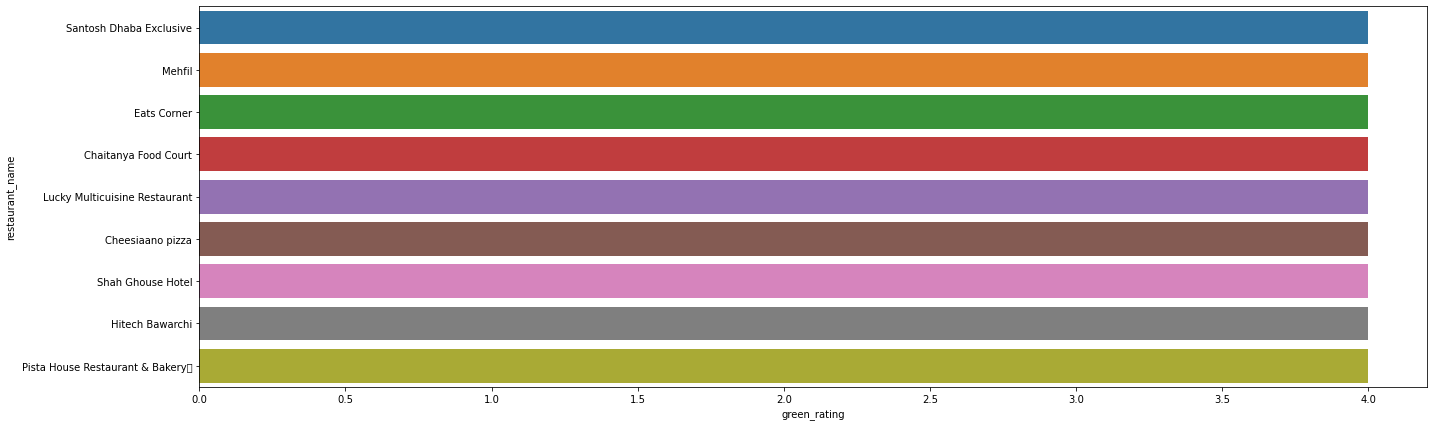

In [64]:
plt.figure(figsize=(22,7))
sns.barplot(x='green_rating',y='restaurant_name',data=df_1.nsmallest(n=10,columns=['green_rating']),orient='h')
plt.show()

In [65]:
df_1.nsmallest(n=10,columns=['orange_rating'])

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
386,Vantillu,"Biryani, South Indian",4.0,3.0,300,WELCOME50,50% off
486,SHANDAR SHAWRMA STAR,Arabian,4.0,3.0,200,WELCOME50,50% off
489,Hafeezpet Vantillu,"North Indian, South Indian",4.0,3.0,250,WELCOME50,50% off
126,Arabian Zaiqa Mandi,Arabian,4.0,3.1,350,WELCOME50,50% off
145,Sri Santosh dhaba,"Indian, North Indian",4.0,3.1,400,WELCOME50,50% off
68,Taste of Rajasthan,"North Indian, Rajasthani, Chinese, Thalis",4.0,3.2,350,WELCOME50,50% off
181,Mukka Mudda,Biryani,4.0,3.2,300,WELCOME50,50% off
421,The Dessert Zone,"Bakery, Desserts, Ice Cream, Beverages",4.0,3.2,200,WELCOME50,50% off
40,Pizza Hut,Pizzas,4.0,3.3,350,SWIGGYIT,40% off
67,Andhra Rice Boxes,Indian,4.0,3.3,400,None,Flat ₹125 off on orders above ₹249


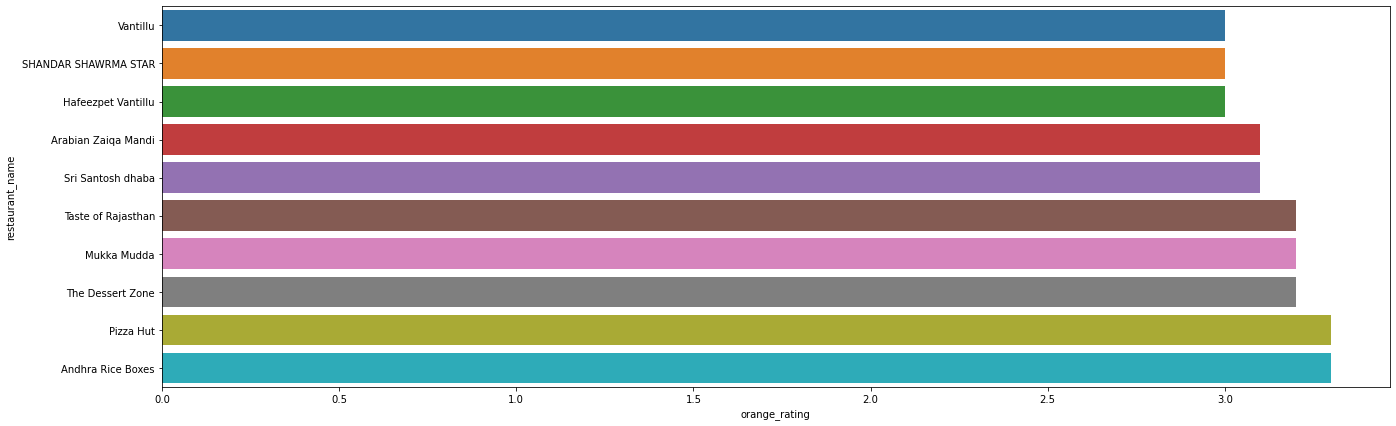

In [66]:
plt.figure(figsize=(22,7))
sns.barplot(x='orange_rating',y='restaurant_name',data=df_1.nsmallest(n=10,columns=['orange_rating']),orient='h')
plt.show()

### Multi Variate Analysis

<AxesSubplot:>

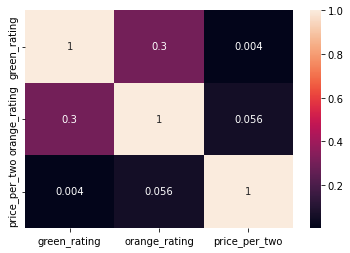

In [67]:
sns.heatmap(data = df_1.corr(),annot=True)

In [73]:
clean_data=pd.read_csv(r'C:\Users\anuragpc\OneDrive\Desktop\clean_data.csv')
clean_data

,Unnamed: 0,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
0,0,100N,"Barbecue, Juices, Healthy Food",4.3,3.9,250,TRYNEW,10% off
1,1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",4.0,3.9,300,TRYNEW,10% off
2,2,Parathas & More,"North Indian, Punjabi, Indian, Thalis, Tandoor",4.0,3.9,350,TRYNEW,40% off
3,3,Chaitanya Food Court - Curries,"Andhra, North Indian, South Indian",4.0,3.9,300,WELCOME50,50% off
4,4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",4.0,3.6,400,PARTY,20% off
...,...,...,...,...,...,...,...,...
476,491,Lo! - Low Carb and Keto Foods,"Healthy Food, Keto, North Indian, Continental",4.3,3.9,100,NaN,Flat ₹125 off on orders above ₹249
477,492,THICKSHAKE HOME,Beverages,4.0,3.9,400,NaN,Flat ₹125 off on orders above ₹249
478,493,LAUGHING BUDDHA,"Chinese, Indian, Biryani",4.0,3.8,200,TRYNEW,50% off
479,494,Goila Butter Chicken,"North Indian, Mughlai, Biryani, Indian",4.0,3.9,600,TRYNEW,50% off


In [72]:
raw_data=pd.read_csv(r'C:\Users\anuragpc\OneDrive\Desktop\clean_data.csv')
raw_data=raw_data.drop(labels=['Unnamed: 0'],axis=1)
raw_data

,restaurant_name,cuisine,green_rating,orange_rating,price_per_two,coupon_code,Discount
0,100N,"Barbecue, Juices, Healthy Food",4.3,3.9,250,TRYNEW,10% off
1,Mehfil,"Biryani, Chinese, Indian, Kebabs, Tandoor, Des...",4.0,3.9,300,TRYNEW,10% off
2,Parathas & More,"North Indian, Punjabi, Indian, Thalis, Tandoor",4.0,3.9,350,TRYNEW,40% off
3,Chaitanya Food Court - Curries,"Andhra, North Indian, South Indian",4.0,3.9,300,WELCOME50,50% off
4,Lucky Multicuisine Restaurant,"Biryani, North Indian, Tandoor, South Indian",4.0,3.6,400,PARTY,20% off
...,...,...,...,...,...,...,...
476,Lo! - Low Carb and Keto Foods,"Healthy Food, Keto, North Indian, Continental",4.3,3.9,100,NaN,Flat ₹125 off on orders above ₹249
477,THICKSHAKE HOME,Beverages,4.0,3.9,400,NaN,Flat ₹125 off on orders above ₹249
478,LAUGHING BUDDHA,"Chinese, Indian, Biryani",4.0,3.8,200,TRYNEW,50% off
479,Goila Butter Chicken,"North Indian, Mughlai, Biryani, Indian",4.0,3.9,600,TRYNEW,50% off


In [70]:
clean_data.coupon_code.value_counts()

 TRYNEW         208
 WELCOME50       99
 JUMBO           21
 PARTY           13
 SWIGGYIT         7
 SPECIALS         6
 THEGOODBOWL      1
 STEALDEAL        1
Name: coupon_code, dtype: int64

<AxesSubplot:xlabel='price_per_two', ylabel='coupon_code'>

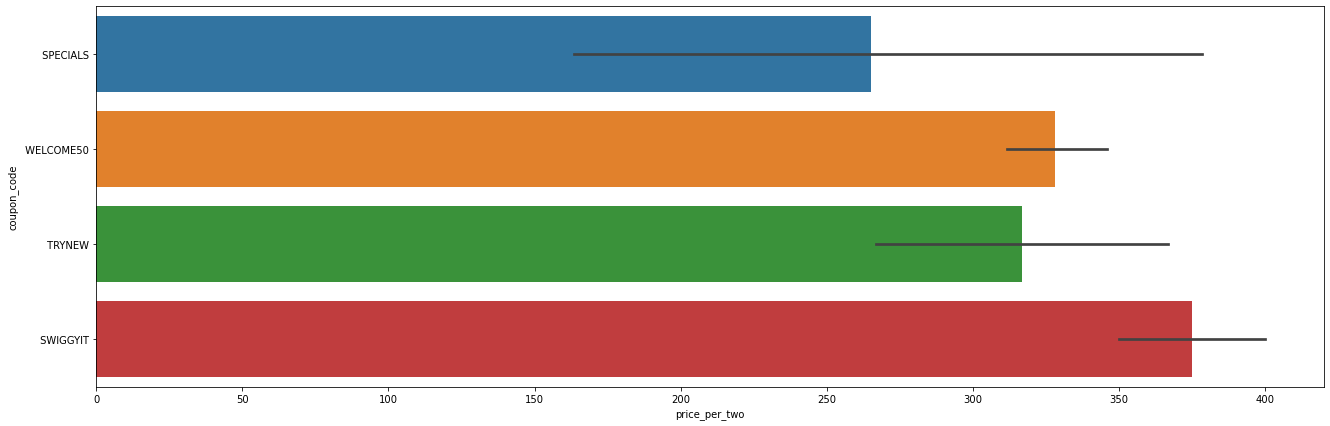

In [71]:
plt.figure(figsize=(22,7))
sns.barplot(data=df_1.nlargest(n=400,columns='green_rating'),y='coupon_code',x='price_per_two',orient='h')